In [1]:
# ------------importing necessary packages-------------------
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

### Maximum Likelihood

* We aim to fit a model to a given set of data 
* If the chosen model to fit is a **statistical model** it has a set of parameters ($\theta$) which determine the characteristics of that statistical model
* We can adjust the model parameters ($\theta$) of a certain distribution to best fit the model to a given dataset
* To do so we need some sort of criterion to assess how well the model is fitted to the data and that criterion is **Likelihood**
* **Likelihood** shows how similar a distribution with a certain set of parameters is to a specific set of data
* We can try various parameters and see which parameters maximize the **Likelihood** 
* Once the best parameters are chosen, the corrsponding model can be used to make prediction on the new data.

for a **discrete probability distribution** $p_{Y}(\theta ; y_{i})$ **Likelihood** is formulated as:
$$L(\theta ; \mathbf{y}) = L(\theta ; y_{1},y_{2}, ..., y_{n} ) = \prod_{i=1}^n  p_{Y}(\theta ; y_{i})$$

for a **continuous probability distribution** $f_{Y}(\theta ; y_{i})$ **Likelihood** is formulated as:
$$L(\theta ; \mathbf{y}) = L(\theta ; y_{1},y_{2}, ..., y_{n} ) = \prod_{i=1}^n  f_{Y}(\theta ; y_{i})$$


Often, instead of maximizing the likelihood, the negative of **log-likelihood** is **minimized**, for example the negative likelihood of a iscrete probability distribution is like: 
$$\ell(\lambda; \mathbf{y}) = -log(L(\theta ; \mathbf{y})) =  -\sum_{i=1}^n log \Bigg(  p_{Y}(\theta ; y_{i}) \Bigg)$$

Now let's consider the **Poisson distribution** which has the following formulation:
$$p_{Y}(\theta ; y_{i}) = p_{Y}(\lambda ; y_{i}) = \frac{\lambda^{y_{i}} e^{- \lambda}}{y_{i}!}$$
in which
* $y_{i}$ is the number of occurrences (  $y_{i}= 0,1,2, ...$ )
* $\lambda$ is a positive real number which is the expected value of Y and also  its variance : $\lambda = E[Y]$ and $\lambda = Var(Y) = E[(Y-E[Y])^2]$

Thus The negative log likelihood for a Poissondistribution is as follows:

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$
 

In [2]:
# ------------poisson negative log likelihood function-------------------
def poissonNegLogLikelihood(lam, y):
    neg_log_lik = - sum(( (np.log(lam)) * y )- lam)
    return neg_log_lik

### Maximum Likelihood Regression
If we considered the distribution of the descrete random variable $Y$ given (conditioned on) the descrete random variable $X$, the **conditional distribution** would be like: 
$$p\space(Y|X=x)$$
$$$$
The expected value or the mean of which is defined as follows:
$$E[Y|X=x] = \mu_{Y|X=x}$$
$$$$
If we considered the $\mu_{Y|X=x}$ as a linear function of X (  $\mu_{Y|X=x} = \mathbf{X}\mathbf{b}$   or simply   $\mu_{Y|X=x} = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ...$) and apply the **Maximum Likelihood** principle to it we would have **Maximum Likelihood Regression**: 
$$$$
Then for any given $x$ the **Prediction Probability** would be the $\mu_{Y|X=x}$ and the **error** for prediction probability could be calculated as : 
$$p\space(Y|X=x) \space-\space\mu_{Y|X=x} $$
$$$$
furthermore, To better model the given data ($X$) some **no-linearity** could be added to the model by applying some **non-linear function** to $\mathbf{X}\mathbf{b}$ before performing the **Likelihood Regression**.
$$$$
For example, one option may be to use the exponential function as the non-linear function, and as in the case of  **Poisson distribution** $\mu_{Y|X=x}\space=\space\lambda  $ we have $\lambda \space=\space \exp(\mathbf{X}\mathbf{b})$ included in the negative log likelihood function in the cell below:

In [3]:
# -----Poisson neg log likelihood regression function--------
def poissonRegressionNegLogLikelihood(b, X, y):
    lam = np.exp(np.dot(X, b))
    neg_log_lik = poissonNegLogLikelihood (lam, y)
    return neg_log_lik

In [4]:
# -------Likliehood Regression Model Prediction function-------
def modelPrediction(b,X):
    yhat = np.exp(np.dot(X, b))
    return yhat

After defining the **negative log-likelihood** and **prediction** functions we have to **minimize** the negative log-likelihood **with respect to the parameters (b)** to find the **optimal parameters**

To this end, we define a function within which we take advantage of the optimization tools in the **scipy** library and define a function whose input arguments are the **data** $\mathbf{X}$ and the **actual target outputs** $\mathbf{y}$ and returns the **estimated parameters vector**  $\hat{\mathbf{b}}$. In the cell below such function is created.  

In [5]:
# -------Neg Log Lik Reg Model Fit function --------
def fitModel(X,y):
    beta_start = np.array([0, 0])
    MLE = so.minimize(poissonRegressionNegLogLikelihood, beta_start, args=(X, y), method = 'Powell', tol = 1e-8)
    print("MLE minimization report : \n")
    print(f"{MLE}\n")
    betas = MLE.x
    return betas

### An example 
Now we fit a **Likelihood Regression** model to a dataset with only **one feature** $x$. Moreover, we fit a **Linear Regression** model with **L2-norm loss** to the same data to compare the performances of the two models on the given data set.

MLE minimization report : 

   direc: array([[ 0.        ,  1.        ],
       [-0.2005827 ,  0.12488441]])
     fun: 28.287152434220964
 message: 'Optimization terminated successfully.'
    nfev: 153
     nit: 4
  status: 0
 success: True
       x: array([-0.15170359,  1.23878459])



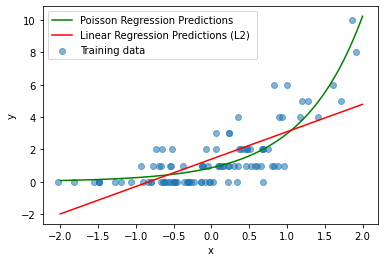

In [7]:
#++++++++++++++++++++Likelihood Regression++++++++++++++++++++

# -------reading the poisson_regression_data as a pandas dataFrame----------
poi_reg_data = pd.read_csv(r"poisson_regression_data.csv")

# ------------getting data : age and tailL columns -------------------
x = poi_reg_data.x.values
y = poi_reg_data.y.values
X =np.c_[np.ones(x.size), x]

# ------------scatter plotting "x" vs "y" -------------------
plt.scatter(x, y, alpha = 0.55, label='Training data')
plt.xlabel('x')
plt.ylabel('y')

# ---fitting the Model to the data & getting estimated parameters---
betas = fitModel(X, y)

# -----generating new data (in the same range as the training data)-----
x_new = np.linspace(-2, 2, 102)
X_new = np.c_[np.ones(x_new.size), x_new]

# --------making predictions on new data using the estimated parameters---------
yhat = modelPrediction (betas, X_new)

# --------plotting the Model predictions on the new data-----------
plt.plot(x_new, yhat, color='g', label='Poisson Regression Predictions')

#++++++++++++++++++++Linear Regression++++++++++++++++++++


# ------------Linear Model Prediction function-------------------
def linearModelPredict(b,X):
    yp = np.dot(X, b)
    return yp 

# ------------Linear Model Loss function-------------------
def linearModelLossRSS(b,X,y):
    yp = linearModelPredict(b, X)
    res = y - yp
    rss = sum(res ** 2)
    gradient = -2*np.dot(res, X)
    return rss, gradient

# ------------Linear Model Fit function (L2)-------------------
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    bstart = np.zeros(X.shape[1])
    RESULT = so.minimize(lossfcn, bstart, args=(X, y), jac=True)
    betas_estimated = RESULT.x
    res_mean = y - np.mean(y)
    RSS, gradient = linearModelLossRSS(betas_estimated, X, y)
    TSS = sum(res_mean ** 2)
    R2 = 1-(RSS/TSS)
    return (betas_estimated,R2)


# ----fitting the Model to the data & getting estimated parameters---
betas, R2 = linearModelFit(X,y)

# -----generating new data (in the same range as the training data)-----
x_new = np.linspace(-2, 2, 102)
X_new = np.c_[np.ones(x_new.size), x_new]

# --------making predictions on new data using the estimated parameters---------
yn = linearModelPredict (betas, X_new)

# --------plotting the Model predictions on the new data-----------
plt.plot(x_new, yn, color='r', label='Linear Regression Predictions (L2) ')
plt.legend()
plt.show()


### Note: 

There are `two problems` with applying an ordinary linear regression model to discrete counts data (like data from a poisson distribution):
 
 
`firstly`: It is quite likely that the regression model will produce negative predicted values, which are theoretically impossible 

`secondly`: OLS regression best fits to data from a normal process not from discrete counts data, thus using OLS regression for discrete counts data can lead great errors and suboptimal fitting.